# kHAI PHÁ DỮ LIỆU FILE calendar.csv

In [1172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1173]:
df = pd.read_csv(r"c:\Users\nguyen\OneDrive\Tài liệu\baitaplonn\Time_Series_with_Python\notebook\data\raw\calendar.csv")

In [1174]:
df

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


# Chú thích
```
date: ngày/tháng/năm thực tế
wm_yr_wk: Mã tuần (week number) trong toàn bộ khoảng thời gian(1 số đầu là nguồn dữ liệu 2 số sau tương ứng năm, 2 số sau là số tuần của năm đó)
weekday: Tên thứ trong tuần (Saturday, Sunday, … Friday)
wday: Mã số của thứ trong tuần (1–7)
month: Tháng trong năm (1–12)
year: Năm của ngày (2011 → 2016)
d: Mã định danh ngày, từ d_1 đến d_1913
event_name_1: tên sự kiện 1
event_name_2: tên sự kiện 2
event_type_1: loại sự kiện 1
event_type_2: loại sự kiện 2
snap_CA: Biến chỉ báo (binary: 0/1), 1 = có chính sách SNAP (Supplemental Nutrition Assistance Program) áp dụng tại California ngày đó
snap_TX: Tương tự cho bang Texas
snap_WI: Tương tự cho bang Wisconsin

# dữ liệu này nói về gì
đây là dữ liệu ghi lại những sự kiện được ghi lại từ ngày đầu tiên (2011-01-29) cho đến ngày cuối cùng 1931 (2016-05-22).

# 1 kiểm tra loại dữ liệu và số giá trị ko phải Nan

In [1175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


```
=> chỉ có 5 ngày là có 2 sự kiện 
=> có 157 ngày có 1 sự kiện
các loại dữ liệu từng cột đã đúng dạng
```

# 2 kiểm tra dữ liệu thiếu

In [1176]:
print(df.isnull().sum())
print(df.isnull().mean() * 100)

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64
date             0.000000
wm_yr_wk         0.000000
weekday          0.000000
wday             0.000000
month            0.000000
year             0.000000
d                0.000000
event_name_1    91.772473
event_type_1    91.772473
event_name_2    99.746064
event_type_2    99.746064
snap_CA          0.000000
snap_TX          0.000000
snap_WI          0.000000
dtype: float64


```
event_name_1 thiếu 1807 giá trị (91.77%)
event_name_2 thiếu 1964 giá trị (99.74%)
event_type_1 thiếu 1807 giá trị (91.77%)
event_type_2 thiếu 1964 giá trị (99.74%)
```
```
=> hầu hết là những ngày không có sự kiện được tổ chức
=> các cột khác ngoài 4 cột trên không có giá trị thiếu
```

# 3 kiểm tra giá trị bất thường và giá trị ngoại lai


In [1177]:
# kiểm tra ngoại lai và bất thường
df.describe()

,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,11347.086338,3.997461,6.325546,2013.288471,0.330117,0.330117,0.330117
std,155.277043,2.001141,3.416864,1.580198,0.470374,0.470374,0.470374
min,11101.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000
25%,11219.000000,2.000000,3.000000,2012.000000,0.000000,0.000000,0.000000
50%,11337.000000,4.000000,6.000000,2013.000000,0.000000,0.000000,0.000000
75%,11502.000000,6.000000,9.000000,2015.000000,1.000000,1.000000,1.000000
max,11621.000000,7.000000,12.000000,2016.000000,1.000000,1.000000,1.000000


=> các cột snap_CA, snap_TX, snap_WI không có giá trị bất thường

# cột date

In [1178]:
# Đảm bảo date ở dạng datetime
df["date"] = pd.to_datetime(df["date"])

# Tạo dãy ngày đầy đủ từ min đến max
full_range = pd.date_range(df["date"].min(), df["date"].max())


# So sánh với dữ liệu thực tế
missing_dates = full_range.difference(df["date"])

print("Ngày nhỏ nhất:", df["date"].min())
print("Ngày lớn nhất:", df["date"].max())
print("Tổng số ngày trong khoảng:", len(full_range))
print("Số ngày có trong dữ liệu:", df["date"].nunique())
print("Số ngày bị thiếu:", len(missing_dates))

Ngày nhỏ nhất: 2011-01-29 00:00:00
Ngày lớn nhất: 2016-06-19 00:00:00
Tổng số ngày trong khoảng: 1969
Số ngày có trong dữ liệu: 1969
Số ngày bị thiếu: 0


không có giá trị bất thường

# cột wm_yr_wk

Ngoại trừ năm 2013 là năm nhuận theo lịch tài chính nên có 53 tuần, các năm còn lại đều có 52 tuần.

In [1179]:


# Tách year và week từ wm_yr_wk
df["year_from_wm"] = df["wm_yr_wk"].astype(str).str[1:3].astype(int) + 2000
df["week_from_wm"] = df["wm_yr_wk"].astype(str).str[3:5].astype(int)

# Lấy ra các tuần duy nhất
unique_weeks = df.drop_duplicates("wm_yr_wk")[["year_from_wm", "week_from_wm"]]
unique_weeks = unique_weeks.sort_values(["year_from_wm", "week_from_wm"]).reset_index(drop=True)

# Kiểm tra tính liên tục
errors = []
for i in range(1, len(unique_weeks)):
    prev_year, prev_week = unique_weeks.loc[i-1, ["year_from_wm", "week_from_wm"]]
    curr_year, curr_week = unique_weeks.loc[i, ["year_from_wm", "week_from_wm"]]
    
    if curr_year == prev_year:  # cùng năm
        if curr_week != prev_week + 1:
            errors.append((prev_year, prev_week, curr_year, curr_week))
    else:  # sang năm mới
        if prev_year == 2013:  # năm 2013 có 53 tuần
            if not (prev_week == 53 and curr_week == 1 and curr_year == prev_year + 1):
                errors.append((prev_year, prev_week, curr_year, curr_week))
        else:  # các năm khác chỉ có 52 tuần
            if not (prev_week == 52 and curr_week == 1 and curr_year == prev_year + 1):
                errors.append((prev_year, prev_week, curr_year, curr_week))

if errors:
    print("Phát hiện lỗi:", errors)
else:
    print("Dữ liệu tuần hợp lệ theo quy tắc!không có giá trị bất thường và ngoại lai")


Dữ liệu tuần hợp lệ theo quy tắc!không có giá trị bất thường và ngoại lai


# cột weekday

In [1180]:


# Tạo mapping chuẩn cho thứ trong tuần
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Thêm cột chỉ số thứ trong tuần
df["weekday_idx"] = df["weekday"].map({day: i for i, day in enumerate(weekday_order)})

# Kiểm tra liên tục
errors = []
for i in range(1, len(df)):
    prev_day = df.loc[i-1, "weekday_idx"]
    curr_day = df.loc[i, "weekday_idx"]
    
    # Thứ sau phải = thứ trước +1, hoặc nếu trước là 6 (Sunday) thì sau phải là 0 (Monday)
    if not (curr_day == (prev_day + 1) % 7):
        errors.append((df.loc[i-1, "date"], df.loc[i-1, "weekday"], 
                       df.loc[i, "date"], df.loc[i, "weekday"]))

if errors:
    print("Phát hiện lỗi trong cột weekday:")
    for e in errors:
        print(f"{e[0]} ({e[1]}) -> {e[2]} ({e[3]})")
else:
    print("Cột weekday chạy đúng theo thứ tự tuần hoàn! không có giá trị bất thường và ngoại lai")


Cột weekday chạy đúng theo thứ tự tuần hoàn! không có giá trị bất thường và ngoại lai


# cột wday

In [1181]:

# Kiểm tra tuần hoàn 1 → 7
errors = []
for i in range(1, len(df)):
    prev_day = df.loc[i-1, "wday"]
    curr_day = df.loc[i, "wday"]
    
    # Ngày sau phải = ngày trước +1, hoặc nếu trước = 7 thì sau = 1
    if not (curr_day == (prev_day % 7) + 1):
        errors.append((df.loc[i-1, "date"], prev_day, df.loc[i, "date"], curr_day))

if errors:
    print("Phát hiện lỗi trong cột wday:")
    for e in errors[:10]:  # in thử 10 lỗi đầu tiên
        print(f"{e[0]} (wday={e[1]}) -> {e[2]} (wday={e[3]})")
else:
    print("Cột wday chạy tuần hoàn đúng từ 1 đến 7! không có giá trị bất thường và ngoại lai")


Cột wday chạy tuần hoàn đúng từ 1 đến 7! không có giá trị bất thường và ngoại lai


# cột month


In [1182]:

# Chuyển cột date sang dạng datetime
df["date"] = pd.to_datetime(df["date"])

# Lấy tháng từ cột date
df["month_from_date"] = df["date"].dt.month

# So sánh với cột month
df["month_match"] = df["month"] == df["month_from_date"]

# Tìm các dòng sai
errors = df[df["month_match"] == False]

if not errors.empty:
    print("Phát hiện lỗi cột month không khớp với date:")
    print(errors[["date", "month", "month_from_date"]].head(10))  # in 10 lỗi đầu tiên
else:
    print("Cột month khớp hoàn toàn với dữ liệu tháng trong date! không có giá trị bất thường và ngoại lai")


Cột month khớp hoàn toàn với dữ liệu tháng trong date! không có giá trị bất thường và ngoại lai


# cột year

In [1183]:

# Chuyển cột date sang datetime
df["date"] = pd.to_datetime(df["date"])

# Lấy năm từ cột date
df["year_from_date"] = df["date"].dt.year

# So sánh với cột year
df["year_match"] = df["year"] == df["year_from_date"]

# Tìm các dòng sai
errors = df[df["year_match"] == False]

if not errors.empty:
    print("Phát hiện lỗi cột year không khớp với date:")
    print(errors[["date", "year", "year_from_date"]].head(10))  # in 10 lỗi đầu tiên
else:
    print("Cột year khớp hoàn toàn với dữ liệu năm trong date! không có giá trị bất thường và ngoại lai")


Cột year khớp hoàn toàn với dữ liệu năm trong date! không có giá trị bất thường và ngoại lai


# cột d

In [1184]:
import re

# Tìm các giá trị không theo dạng d_số
invalid_d = df[~df["d"].astype(str).str.match(r"^d_\d+$")]["d"].unique()

print("Số giá trị không đồng nhất:", len(invalid_d))
print("Các giá trị bất thường:", invalid_d)


Số giá trị không đồng nhất: 0
Các giá trị bất thường: []


In [1185]:
# Chuyển d -> số
df["d_num"] = df["d"].str.extract(r"(\d+)").astype(int)

# Kiểm tra liên tục
is_continuous = (df["d_num"].diff().dropna() == 1).all()
print("Cột d không có giá trị bất thường và ngoại lai:", is_continuous)

Cột d không có giá trị bất thường và ngoại lai: True


# 4. kiểm tra giá trị trùng lặp 

In [1186]:
duplicates = df.duplicated().sum()
print("Số dòng trùng lặp:", duplicates)
df[df.duplicated()]


Số dòng trùng lặp: 0


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,...,snap_TX,snap_WI,year_from_wm,week_from_wm,weekday_idx,month_from_date,month_match,year_from_date,year_match,d_num


=> không có giá trị trùng lặp

# 5. kiểm tra dữ liệu những ngày có sự kiện

In [1187]:
# Kiểm tra cặp 1
mismatch_1 = df[
    (df["event_name_1"].notna() & df["event_type_1"].isna()) |
    (df["event_name_1"].isna() & df["event_type_1"].notna())
]

# Kiểm tra cặp 2
mismatch_2 = df[
    (df["event_name_2"].notna() & df["event_type_2"].isna()) |
    (df["event_name_2"].isna() & df["event_type_2"].notna())
]

print("Số dòng mismatch ở cặp 1:", len(mismatch_1))
print("Số dòng mismatch ở cặp 2:", len(mismatch_2))

# Nếu muốn xem chi tiết vài dòng lỗi:
display(mismatch_1.head())
display(mismatch_2.head())

Số dòng mismatch ở cặp 1: 0
Số dòng mismatch ở cặp 2: 0


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,...,snap_TX,snap_WI,year_from_wm,week_from_wm,weekday_idx,month_from_date,month_match,year_from_date,year_match,d_num


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,...,snap_TX,snap_WI,year_from_wm,week_from_wm,weekday_idx,month_from_date,month_match,year_from_date,year_match,d_num


In [1188]:
# Lọc những dòng có ít nhất 1 sự kiện
events_df = df[(df["event_name_1"].notna()) | (df["event_name_2"].notna())]

print("Tổng số dòng có sự kiện:", events_df.shape[0])
display(events_df.head(20))  # Hiển thị 20 dòng đầu tiên

Tổng số dòng có sự kiện: 162


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,...,snap_TX,snap_WI,year_from_wm,week_from_wm,weekday_idx,month_from_date,month_match,year_from_date,year_match,d_num
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,...,1,1,2011,2,6,2,True,2011,True,9
16,2011-02-14,11103,Monday,3,2,2011,d_17,ValentinesDay,Cultural,NaN,...,0,1,2011,3,0,2,True,2011,True,17
23,2011-02-21,11104,Monday,3,2,2011,d_24,PresidentsDay,National,NaN,...,0,0,2011,4,0,2,True,2011,True,24
39,2011-03-09,11106,Wednesday,5,3,2011,d_40,LentStart,Religious,NaN,...,1,1,2011,6,2,3,True,2011,True,40
46,2011-03-16,11107,Wednesday,5,3,2011,d_47,LentWeek2,Religious,NaN,...,0,0,2011,7,2,3,True,2011,True,47
47,2011-03-17,11107,Thursday,6,3,2011,d_48,StPatricksDay,Cultural,NaN,...,0,0,2011,7,3,3,True,2011,True,48
50,2011-03-20,11108,Sunday,2,3,2011,d_51,Purim End,Religious,NaN,...,0,0,2011,8,6,3,True,2011,True,51
85,2011-04-24,11113,Sunday,2,4,2011,d_86,OrthodoxEaster,Religious,Easter,...,0,0,2011,13,6,4,True,2011,True,86
87,2011-04-26,11113,Tuesday,4,4,2011,d_88,Pesach End,Religious,NaN,...,0,0,2011,13,1,4,True,2011,True,88
96,2011-05-05,11114,Thursday,6,5,2011,d_97,Cinco De Mayo,Cultural,NaN,...,1,1,2011,14,3,5,True,2011,True,97


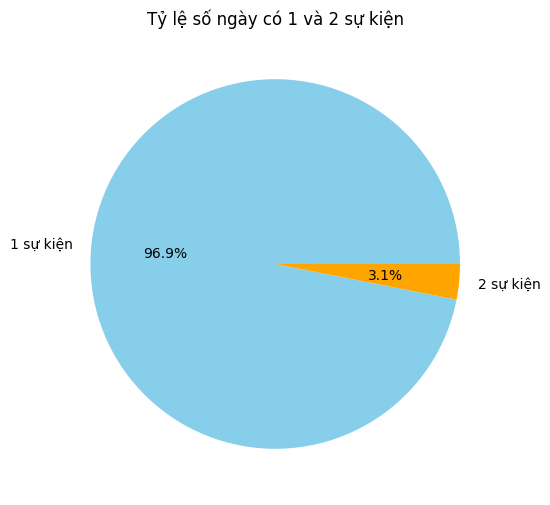

In [1189]:


# Đếm số ngày có 2 sự kiện (cả 2 cặp name+type đều tồn tại)
both_events = df.dropna(subset=["event_name_1", "event_type_1", "event_name_2", "event_type_2"]).shape[0]

# Đếm số ngày có đúng 1 sự kiện
one_event = df[
    ((df["event_name_1"].notna()) & (df["event_type_1"].notna()) & (df["event_name_2"].isna()) & (df["event_type_2"].isna())) |
    ((df["event_name_2"].notna()) & (df["event_type_2"].notna()) & (df["event_name_1"].isna()) & (df["event_type_1"].isna()))
].shape[0]

# Tạo DataFrame để vẽ
event_summary = pd.DataFrame({
    "Số ngày": [one_event, both_events]
}, index=["1 sự kiện", "2 sự kiện"])

# Vẽ biểu đồ tròn
plt.figure(figsize=(6,6))
event_summary["Số ngày"].plot(kind="pie", autopct="%.1f%%", colors=["skyblue", "orange"])
plt.title("Tỷ lệ số ngày có 1 và 2 sự kiện")
plt.ylabel("")
plt.show()


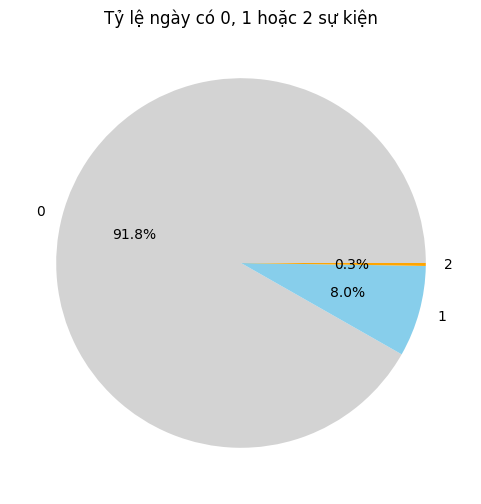

In [1190]:
# Xác định số sự kiện mỗi ngày
def count_events(row):
    count = 0
    if pd.notna(row["event_name_1"]) and pd.notna(row["event_type_1"]):
        count += 1
    if pd.notna(row["event_name_2"]) and pd.notna(row["event_type_2"]):
        count += 1
    return count

df["num_events"] = df.apply(count_events, axis=1)

# Thống kê số lượng ngày theo số sự kiện
event_counts = df["num_events"].value_counts().sort_index()

# Vẽ biểu đồ tròn
plt.figure(figsize=(6,6))
event_counts.plot(kind="pie", autopct="%.1f%%", colors=["lightgray","skyblue","orange"])
plt.title("Tỷ lệ ngày có 0, 1 hoặc 2 sự kiện")
plt.ylabel("")
plt.show()

📊 Thống kê loại lễ hội:
  event_type  unique_events  total_occurrences
0   Cultural              7                 41
1   National             10                 52
2  Religious             10                 56
3   Sporting              3                 18


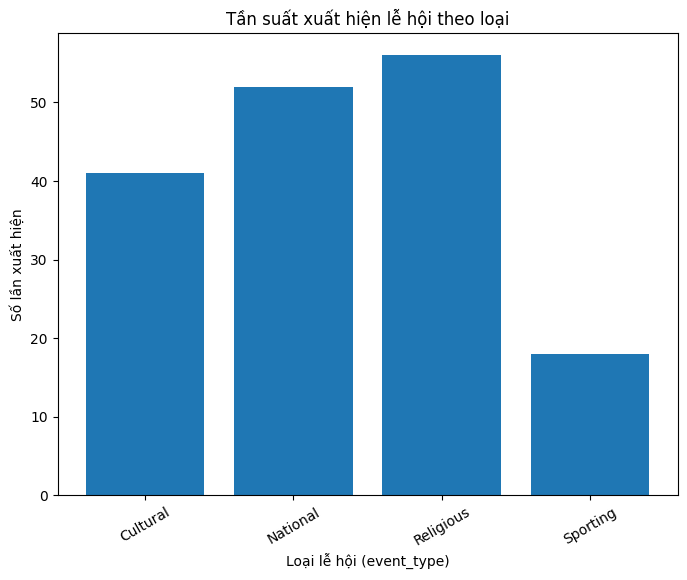

In [1191]:

# Gom dữ liệu từ 2 cột sự kiện lại
events = pd.concat([
    df[["event_name_1", "event_type_1"]].rename(columns={"event_name_1": "event_name", "event_type_1": "event_type"}),
    df[["event_name_2", "event_type_2"]].rename(columns={"event_name_2": "event_name", "event_type_2": "event_type"})
])

# Bỏ NaN
events = events.dropna(subset=["event_name"])

# Thống kê số lượng theo loại lễ hội
event_type_count = events.groupby("event_type")["event_name"].nunique().reset_index(name="unique_events")
event_type_count["total_occurrences"] = events.groupby("event_type")["event_name"].count().values

print("📊 Thống kê loại lễ hội:")
print(event_type_count)

# Vẽ sơ đồ cột
plt.figure(figsize=(8,6))
plt.bar(event_type_count["event_type"], event_type_count["total_occurrences"])
plt.title("Tần suất xuất hiện lễ hội theo loại")
plt.xlabel("Loại lễ hội (event_type)")
plt.ylabel("Số lần xuất hiện")
plt.xticks(rotation=30)
plt.show()

# nhận xét
giữ liệu sạch đã được tối ưu, không có giá trị bất thường và giá trị ngoại lai

